In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
df.shape

(10129, 19)

In [4]:
df[df.duplicated()]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count


In [5]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [7]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [8]:
df.Room_Occupancy_Count.value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

In [9]:
DateTimeConc = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(DateTimeConc)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10129 non-null  object        
 1   Time                  10129 non-null  object        
 2   S1_Temp               10129 non-null  float64       
 3   S2_Temp               10129 non-null  float64       
 4   S3_Temp               10129 non-null  float64       
 5   S4_Temp               10129 non-null  float64       
 6   S1_Light              10129 non-null  int64         
 7   S2_Light              10129 non-null  int64         
 8   S3_Light              10129 non-null  int64         
 9   S4_Light              10129 non-null  int64         
 10  S1_Sound              10129 non-null  float64       
 11  S2_Sound              10129 non-null  float64       
 12  S3_Sound              10129 non-null  float64       
 13  S4_Sound        

In [11]:
df.drop(columns=['Date','Time'], inplace = True)

In [12]:
df.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count',
       'DateTime'],
      dtype='object')

In [13]:
df.corr()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,0.438769,0.355826,0.866718,0.137391,0.436363,0.474077,0.700868
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,0.427133,0.378724,0.743722,0.202547,0.476901,0.465884,0.671263
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,0.398177,0.326182,0.821308,0.095842,0.403355,0.460309,0.652047
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,0.340808,0.294939,0.650320,0.106208,0.340000,0.339037,0.526509
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,0.494080,0.441712,0.602740,0.498185,0.607159,0.545213,0.849058
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,0.439269,0.413932,0.566764,0.493281,0.554658,0.556797,0.788764
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,0.577151,0.473606,0.650829,0.447708,0.501836,0.577815,0.793081
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,0.169702,0.200793,0.148608,0.212718,0.324545,0.220196,0.355715
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,0.540736,0.557733,0.391903,0.335772,0.522015,0.463040,0.573748
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,0.529830,0.578635,0.333836,0.357235,0.485697,0.507231,0.557853


In [14]:
df['S1_4_Temp_Mean'] = (df['S1_Temp'] + df['S2_Temp'] + df['S3_Temp'] + df['S4_Temp']) / 4
df['S1_4_Light_Mean'] = (df['S1_Light'] + df['S2_Light'] + df['S3_Light'] + df['S4_Light']) / 4
df['S1_4_Sound_Mean'] = (df['S1_Sound'] + df['S2_Sound'] + df['S3_Sound'] + df['S4_Sound']) / 4
df['S6_7_PIR_Sum'] = df['S6_PIR'] + df['S7_PIR']

In [15]:
#Original_Features = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
#       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
#       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
Aggregated_Features = ['S1_4_Temp_Mean', 'S1_4_Light_Mean', 'S1_4_Sound_Mean',
       'S6_7_PIR_Sum', 'S5_CO2', 'S5_CO2_Slope']

In [16]:
list_df_Agg = Aggregated_Features.copy()
list_df_Agg.insert(0, 'Room_Occupancy_Count')

In [17]:
df[list_df_Agg].describe()

,Room_Occupancy_Count,S1_4_Temp_Mean,S1_4_Light_Mean,S1_4_Sound_Mean,S6_7_PIR_Sum,S5_CO2,S5_CO2_Slope
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,0.398559,25.452704,24.732525,0.137551,0.169711,460.860401,-0.004830
std,0.893633,0.399201,43.811460,0.231763,0.493767,199.964940,1.164990
min,0.000000,24.890000,0.000000,0.052500,0.000000,345.000000,-6.296154
25%,0.000000,25.127500,0.000000,0.062500,0.000000,355.000000,-0.046154
50%,0.000000,25.362500,0.000000,0.067500,0.000000,360.000000,0.000000
75%,0.000000,25.612500,30.500000,0.075000,0.000000,465.000000,0.000000
max,3.000000,26.800000,193.750000,3.182500,2.000000,1270.000000,8.980769


In [18]:
df[list_df_Agg].corr()

,Room_Occupancy_Count,S1_4_Temp_Mean,S1_4_Light_Mean,S1_4_Sound_Mean,S6_7_PIR_Sum,S5_CO2,S5_CO2_Slope
Room_Occupancy_Count,1.000000,0.692698,0.854160,0.653527,0.748247,0.660144,0.601105
S1_4_Temp_Mean,0.692698,1.000000,0.685873,0.506396,0.523816,0.828725,0.153957
S1_4_Light_Mean,0.854160,0.685873,1.000000,0.646892,0.667364,0.626629,0.507454
S1_4_Sound_Mean,0.653527,0.506396,0.646892,1.000000,0.657848,0.472438,0.401771
S6_7_PIR_Sum,0.748247,0.523816,0.667364,0.657848,1.000000,0.488761,0.446805
S5_CO2,0.660144,0.828725,0.626629,0.472438,0.488761,1.000000,0.069220
S5_CO2_Slope,0.601105,0.153957,0.507454,0.401771,0.446805,0.069220,1.000000


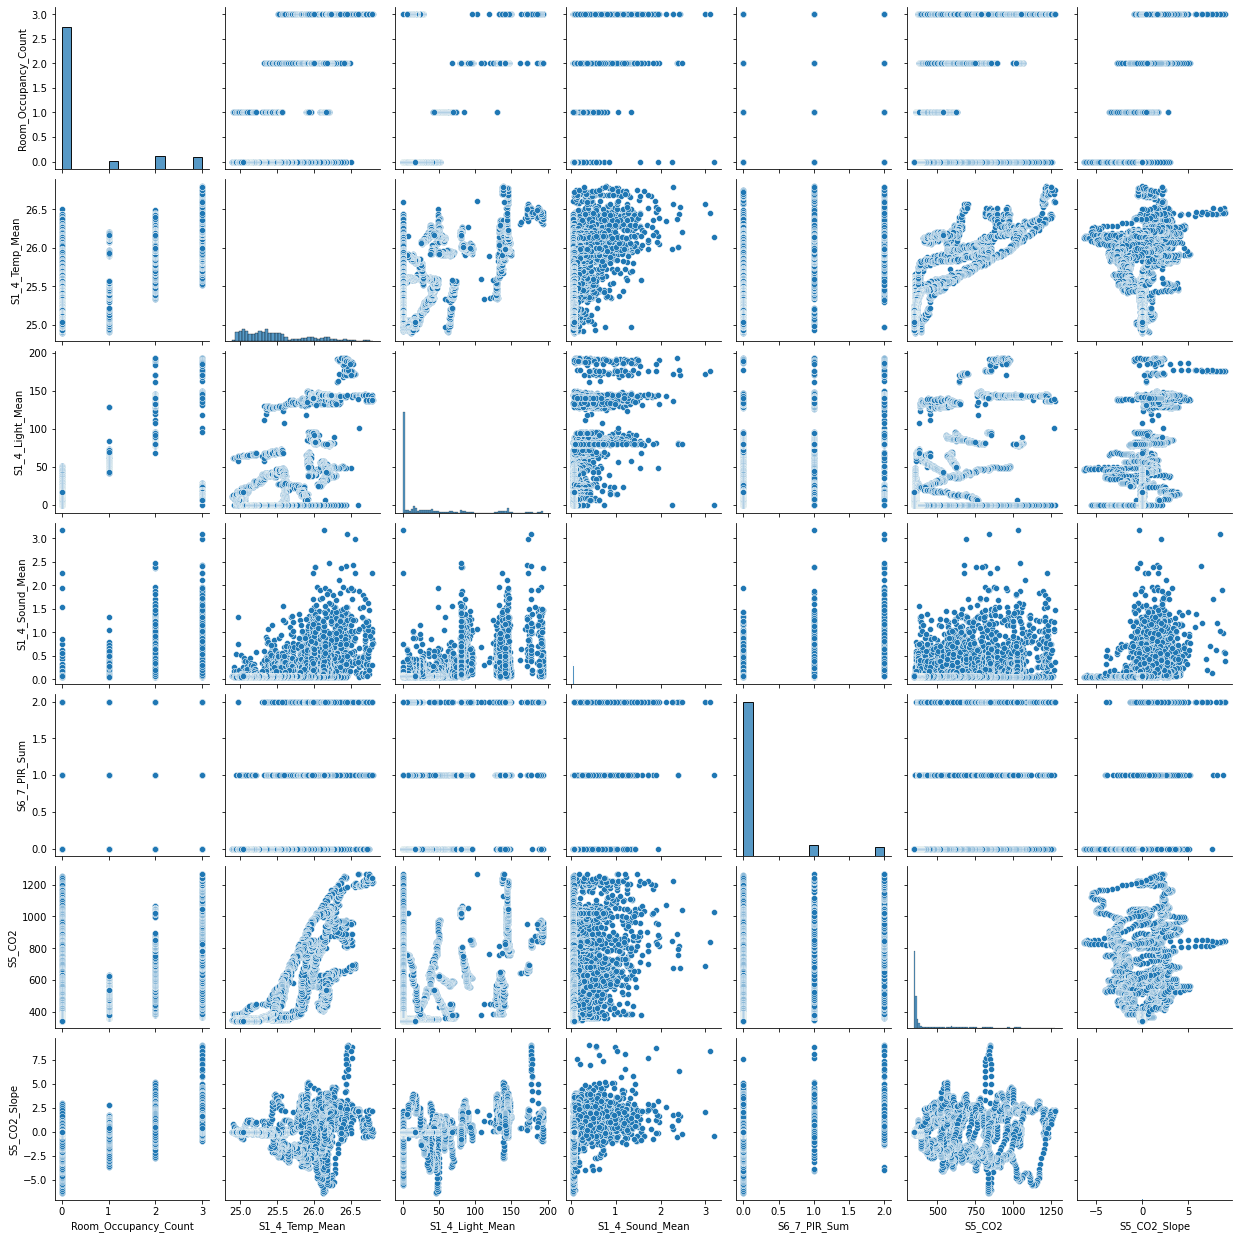

In [19]:
sns.pairplot(df[list_df_Agg]);

In [20]:
from sklearn.model_selection import train_test_split

X = df[Aggregated_Features]
y = df['Room_Occupancy_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
print(X_train)

      S1_4_Temp_Mean  S1_4_Light_Mean  S1_4_Sound_Mean  S6_7_PIR_Sum  S5_CO2  \
1937         25.1425             0.00           0.0600             0     360   
4477         25.3300             0.00           0.0600             0     365   
8550         25.5475             0.00           0.0625             0     530   
1346         25.4850             0.00           0.0600             0     390   
7296         25.3475             0.00           0.0700             0     355   
...              ...              ...              ...           ...     ...   
5734         25.4075            41.50           0.0675             0     355   
5191         25.0650            14.25           0.0575             0     360   
5390         25.0625            23.50           0.0650             0     355   
860          26.3750           144.00           0.4100             1    1160   
7270         25.3125             0.00           0.0675             0     355   

      S5_CO2_Slope  
1937      0.000000

In [22]:
print(X_test)

      S1_4_Temp_Mean  S1_4_Light_Mean  S1_4_Sound_Mean  S6_7_PIR_Sum  S5_CO2  \
8855         25.2650             0.00           0.0625             0     360   
532          25.9675            61.75           0.0650             0     590   
1155         25.6725             0.00           0.0600             0     645   
7769         25.1125             0.00           0.0725             0     350   
4922         25.1275             0.00           0.0575             0     360   
...              ...              ...              ...           ...     ...   
9396         25.0800             0.00           0.0600             0     345   
8359         26.0000            95.25           0.3400             1     830   
9609         25.0500             0.00           0.0600             0     345   
8936         25.2350             0.00           0.0650             0     350   
8513         25.5800             0.00           0.0650             0     620   

      S5_CO2_Slope  
8855      0.000000

In [23]:
print(y_train)

1937    0
4477    0
8550    0
1346    0
7296    0
       ..
5734    0
5191    0
5390    0
860     3
7270    0
Name: Room_Occupancy_Count, Length: 8103, dtype: int64


In [24]:
print(y_test)

8855    0
532     1
1155    0
7769    0
4922    0
       ..
9396    0
8359    2
9609    0
8936    0
8513    0
Name: Room_Occupancy_Count, Length: 2026, dtype: int64


In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_Scl = sc.fit_transform(X_train)
X_test_Scl = sc.transform(X_test)

In [26]:
print(X_train_Scl)

[[-0.76937327 -0.5609514  -0.33326261 -0.34110302 -0.50225845  0.01289966]
 [-0.30095103 -0.5609514  -0.33326261 -0.34110302 -0.47739742  0.01289966]
 [ 0.24241877 -0.5609514  -0.32241377 -0.34110302  0.34301654 -2.20336051]
 ...
 [-0.96923342 -0.01944273 -0.31156494 -0.34110302 -0.52711947  0.01289966]
 [ 2.30972225  2.75722937  1.18557429  1.70627311  3.47550621  2.71910458]
 [-0.34467044 -0.5609514  -0.3007161  -0.34110302 -0.52711947  0.01289966]]


In [27]:
print(X_test_Scl)

[[-0.4633374  -0.5609514  -0.32241377 -0.34110302 -0.50225845  0.01289966]
 [ 1.29168458  0.86194903 -0.31156494 -0.34110302  0.64134889  0.65081431]
 [ 0.55470026 -0.5609514  -0.33326261 -0.34110302  0.91482021 -1.87453853]
 ...
 [-1.00046157 -0.5609514  -0.33326261 -0.34110302 -0.57684153  0.01289966]
 [-0.53828496 -0.5609514  -0.31156494 -0.34110302 -0.5519805  -0.02655898]
 [ 0.32361196 -0.5609514  -0.31156494 -0.34110302  0.79051507 -0.82888462]]


In [28]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 42, max_iter = 7000)
LR.fit(X_train, y_train)

LR_SclFt = LogisticRegression(random_state = 42)
LR_SclFt.fit(X_train_Scl, y_train)

LogisticRegression(random_state=42)

In [29]:
LR_y_pred = LR.predict(X_test)
LR_SclFt_y_pred = LR_SclFt.predict(X_test_Scl)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

LR_cm = confusion_matrix(y_test, LR_y_pred)
LR_SclFt_cm = confusion_matrix(y_test, LR_SclFt_y_pred)

print('LR confusion matrix')
print(LR_cm)
print('#######')
print('LR confusion matrix with standardized features')
print(LR_SclFt_cm)
print('-------')

print('LR accuracy score')
print(accuracy_score(y_test, LR_y_pred))
print('#######')
print('LR accuracy score with standardized features')
print(accuracy_score(y_test, LR_SclFt_y_pred))
print('-------')

print('LR report')
print(classification_report(y_test, LR_y_pred))
print('#######')
print('LR report with standardized features')
print(classification_report(y_test, LR_SclFt_y_pred))

LR confusion matrix
[[1613    0    4    2]
 [   9   84   10    0]
 [   0    2  122   40]
 [  10    6   22  102]]
#######
LR confusion matrix with standardized features
[[1612    1    0    6]
 [  10   83    6    4]
 [   0    3  131   30]
 [   9    7   20  104]]
-------
LR accuracy score
0.9481737413622903
#######
LR accuracy score with standardized features
0.9526159921026653
-------
LR report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1619
           1       0.91      0.82      0.86       103
           2       0.77      0.74      0.76       164
           3       0.71      0.73      0.72       140

    accuracy                           0.95      2026
   macro avg       0.85      0.82      0.83      2026
weighted avg       0.95      0.95      0.95      2026

#######
LR report with standardized features
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1619
           1   

In [31]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(X_train, y_train)

GaussianNB()

In [32]:
GNB_y_pred = GNB.predict(X_test)

In [34]:
GNB_cm = confusion_matrix(y_test, GNB_y_pred)

print('GNB confusion matrix')
print(GNB_cm)

print('GNB accuracy score')
print(accuracy_score(y_test, GNB_y_pred))

print('GNB report')
print(classification_report(y_test, GNB_y_pred))

GNB confusion matrix
[[1583    1   10   25]
 [   0   97    4    2]
 [   0    0  146   18]
 [   6    6   23  105]]
GNB accuracy score
0.9531095755182626
GNB report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1619
           1       0.93      0.94      0.94       103
           2       0.80      0.89      0.84       164
           3       0.70      0.75      0.72       140

    accuracy                           0.95      2026
   macro avg       0.86      0.89      0.87      2026
weighted avg       0.96      0.95      0.95      2026



In [42]:
import xgboost as xgb

XGB = xgb.XGBClassifier( 
                        n_estimators=600,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8,
                        use_label_encoder=False
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = XGB.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='mlogloss', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

In [43]:
XGB_y_pred = XGB.predict(X_test)

In [44]:
XGB_cm = confusion_matrix(y_test, XGB_y_pred)

print('XGB confusion matrix')
print(XGB_cm)

print('XGB accuracy score')
print(accuracy_score(y_test, XGB_y_pred))

print('XGB report')
print(classification_report(y_test, XGB_y_pred))


XGB confusion matrix
[[1618    0    0    1]
 [   0  103    0    0]
 [   0    1  161    2]
 [   2    0    2  136]]
XGB accuracy score
0.9960513326752222
XGB report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.98      0.98       164
           3       0.98      0.97      0.97       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

